# Noah Dunn

### nad5na@virginia.edu

### DS 5001 

### 05/05/2023

# Introduction

For this project, I decided to use the set of Harry Potter books as my corpus of documents. The corpus consists of seven nonfiction books, each covering a year in the life of Harry Potter while attending Hogwarts School of Witchcraft and Wizardry. While I have read these books before, it has been many years so I do not remember specifics as much as the general flow of the series. In books 1, 2, and 4, I remember a generally positive sentiment throughout the books until the protagonists had to face some form of evil (usually something to do with Voldemort) at the very end. I thought that book 3 was generally as positive as 1, 2, and 4, but it also had many instances where negative things were occurring for the protagonists. For instance, there were many cases throughout the book where dementors and the name Sirius Black were mentioned, and until at least the end of the book these seemed to have very negative sentiments surrounding them. At the end of the fourth book in the series Voldemort returns, and this means that the final three books in the series seemed to follow much darker storylines. The ends of books 5 and 6 were especially dark, with both Sirius and Dumbledore meeting their ends. The storylines through these two books were also filled with various ‘dark’ occurrences and characters who demand a negative sentiment. However, I remember the final book in the series being the darkest of them all. In the final pages, the ‘good’ guys and protagonists defeat Voldemort and bring an end to the general darkness of the book series, but this comes after a great deal of death, despair, and the general feeling that the ‘dark’ forces would win out. 

Based on my general memory of the series, I wanted to analytically explore the texts in order to see if the sentiments and patterns extracted would run parallel to my concept of what happened. In particular, I looked to see if there was a noticeable uptick in negative sentiments and emotions in the final three books when compared to the first two. I also looked to see if novels 1, 2, and 4 contained similar themes and topics while novels 5, 6, and 7 would contain their own set of similarities. With this ordering, the third book seemed to stand on its own in terms of general sentiment, so I also wanted to see whether an in-depth analysis would link it more closely to the earlier (happier) books, or the later (darker) ones.

# Source Data

The books had already been saved in PDF format on my laptop for several months, and they were sourced from various websites that would allow free PDF downloads of the files. For this project, I used PyPDF2 in order to scrape the text data out of the PDF files and save them in a .txt format. The PyPDF2 package was very helpful, but some of the PDF books that I had on my computer were in odd formats, so I had to manually change some of the text files. This mostly involved ensuring that the chapters were each labeled in a similar manner, as well as to remove extraneous text at the beginnings and ends of the files. These seven text files can be found [here](https://virginia.app.box.com/folder/206358245223) - each is named “hpX.txt” where “X” is replaced with the numbers 1 through 7. On average, the seven novels contain roughly 158,000 tokens each. The average number of chapters per novel is 28, and the average number of sentences per novel is 15,656. 

# Data Model

Throughout the analysis of the text across these seven novels, data was formatted and stored in many different ways. To begin, a LIB table containing each of the novels, their file source paths, their titles, their distinct token, chapter, and sentence counts, and their common author and genre can be found [here](https://virginia.app.box.com/file/1207141005828). Another important table that was curated was the CORPUS which contains an index of each of the books, chapters, sentences, and tokens, in order, for all seven novels. Other notable dimensions for each term in this table are their parts of speech, counts across all documents, variations of the term being stemmed, and a variety of statistics including TF, IDF, TFIDF, and more. The CORPUS table can be found [here](https://virginia.app.box.com/file/1207142808377). The final of the three main tables produced during analysis is the VOCAB table which contains much of the same information as the CORPUS table, but now the index is made up of each term and the statistics are specific to those terms across the entire set of novels. The VOCAB table can be found [here](https://virginia.app.box.com/file/1207149674880). Some more generalized tables across the novels are the Document Term Matrix and the Bag of Words table. The Document Term Matrix contains an index of the novel titles and columns populated by the occurrence of each of the top 4,000 words in each novel - the DTM table can be found [here](https://virginia.app.box.com/file/1207147330588). The Bag of Words table contains a simplified version of the VOCAB table, with an index composed of books, chapters, and terms, as well as statistics like the word count, TF, and TFIDF for each term - the BOW table can be found [here](https://virginia.app.box.com/file/1207086628836).

While there were many generalizable tables created throughout the exploratory process, there were also several important ones created with more specific purposes. For performing principal component analysis across the documents, the PCA documents and components table and the PCA loadings tables were created. The PCA documents and components table contains an index of the seven novels and columns indicating their weightings for each of the five topics extracted - the PCAdocscomps table can be found [here](https://virginia.app.box.com/file/1207143223729). The PCA loadings table contains an index of words and column values denoting their weightings across each of the principal components. The words composing this table were the top 1,000 words by TFIDF importance, and the LOADINGS table can be found [here](https://virginia.app.box.com/file/1207130811268). 

For performing Latent Dirichlet Allocation topic modeling, THETA and PHI tables were created in order to hold important information. The THETA table contains an index of the seven novels and column values for topic concentrations of each novel, spread across five extracted topics. The PHI table contains the most prevalent 4,000 words across the novels, each corresponding with each of the five extracted topics. The THETA table can be found [here](https://virginia.app.box.com/file/1207145223121) and the PHI table can be found [here](https://virginia.app.box.com/file/1207142352503).

In order to organize the word embeddings extracted from the novels, a COORDS table was created from the VOCAB table. The COORDS table contains an index of the roughly top 1,000 words returned from a TSNE model and contains most of the same information as the VOCAB table for each term, but it also contains mapped x and y coordinates in order to compare the words with each other. The COORDS table can be found [here](https://virginia.app.box.com/file/1207150480848). Finally, while performing sentiment analysis the final two important tables were created: the vocabulary sentiment table and the document sentiment and polarity table. The vocabulary sentiment table, SentimentEmos, contains an index of vocabulary terms, most of the same statistics as the VOCAB table, but also values (either -1, 0, or 1) for a range of sentiments and emotions. The document sentiment and polarity table, SentimentPols, contains an index of the seven novels and column values representing their total weightings across various emotions and sentiment. The SentimentEmos table can be found [here](https://virginia.app.box.com/file/1207144303575) and the SentimentPols table can be found [here](https://virginia.app.box.com/file/1207131927495).

# Exploration

One of the first exploratory actions taken, after a general cleaning and organization of the corpus from each novel, was to compare the similarities of each book to the other six. To do this, normalized TFIDF tables were used to create a table of pairs of novels which then used the Scipy pdist function to find their similarity scores. The pdist function was used with several distance measurement parameters including cityblock, euclidean, cosine, jaccard, dice, and jensenshannon. The following table, sorted by cosine similarity, displays these comparisons.

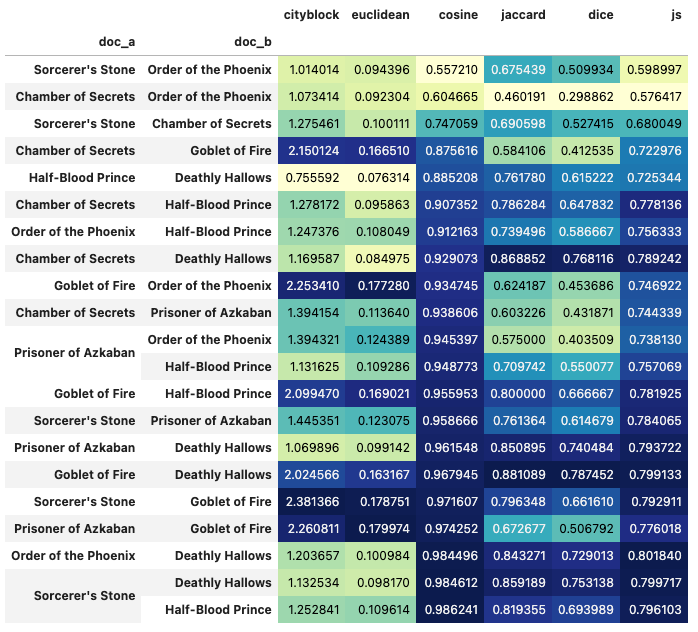

With this information, dendrograms were created in order to better display the similarity comparisons between the novels. The following four dendrograms display, in order, the cosine measure using ward linkage, the jaccard measure, the euclidean measure using ward linkage, and the jensenshannon measure.

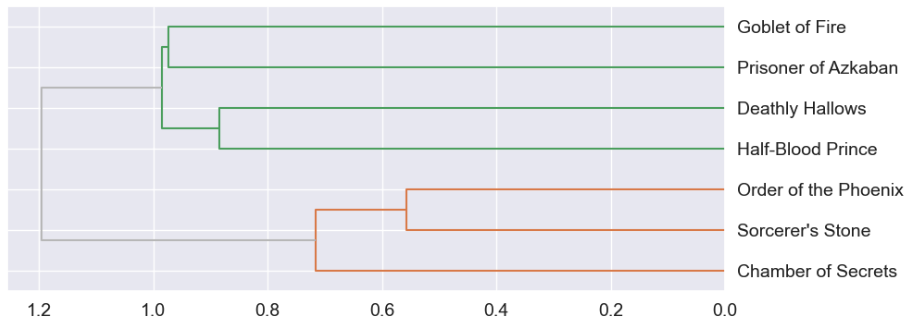

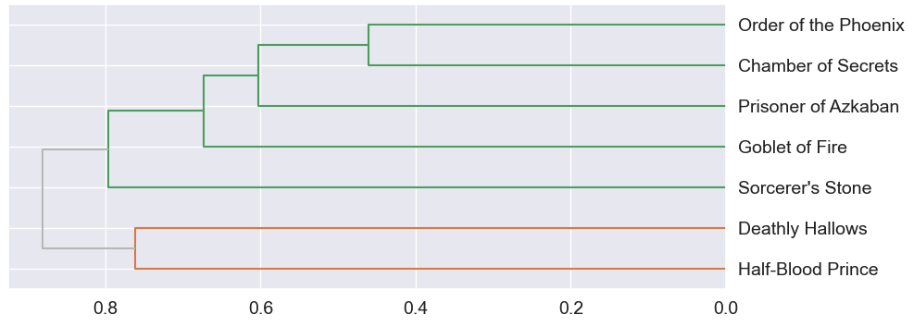

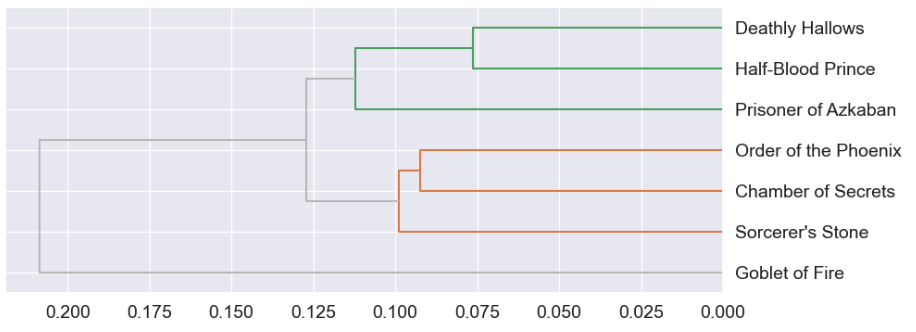

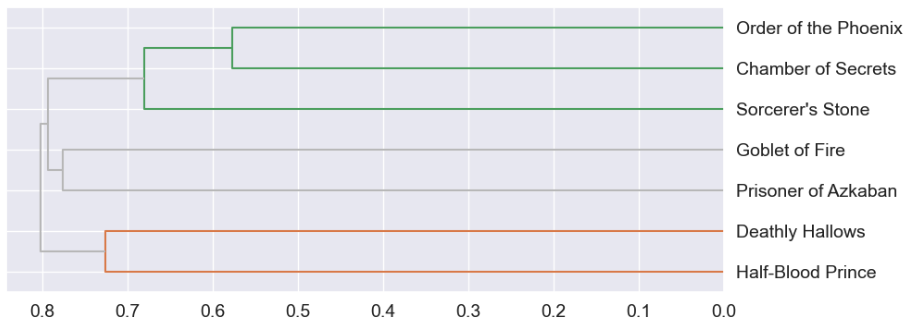

Principal component analysis also yielded a variety of useful insights into and across the seven novels. For PCA, an L2 normalized TFIDF table for the top 1000 terms across all seven novels was created. From this, a covariance table was created and used to populate eigenvalue and eigenvector dataframes for word weights across 10 principal components. An initial comparison of the most positive and negative words within each extracted principal component is shown in the first figure below. The second figure displays the principal component weightings across each of the novels. In the second figure, the weightings of the last five principal components is left out as these were each extremely low when compared to the first five. This was also true when principal component analysis was run using SciKit Learn, as can be seen in the third figure below. There were multiple other visualizations created during principal component analysis, but I did not believe that they helped my analysis of the Harry Potter novels.

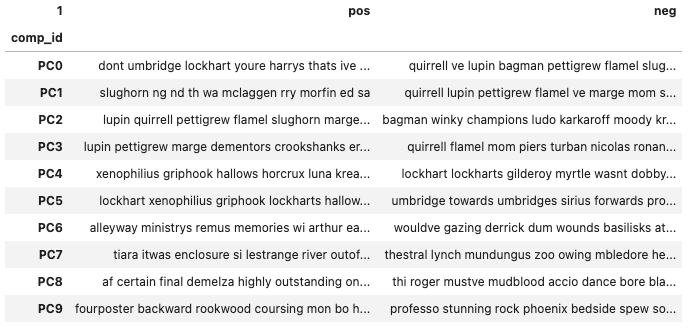

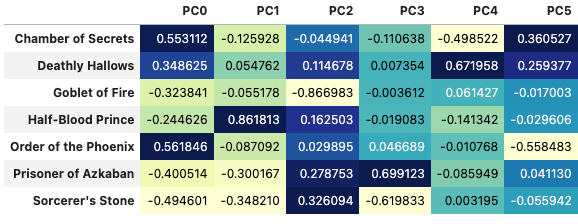

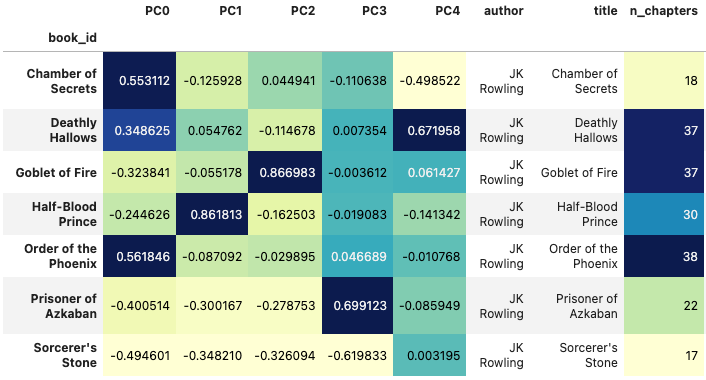

Topic modeling was the next analysis method used over the corpus of novels. For topic modeling, Latent Dirichlet Allocation was used with 4,000 vocabulary terms and a predefined number of topics: 5. The first figure below shows how each of the seven books were found to be weighted among the five topics, and the second figure displays how a random selection of 20 words are weighted for each of the topics. While it is obvious that topics two and four here have very little weighting for any of the novels or words, when using a smaller predefined number of topics the results begin to act oddly. The third figure below shows the top weighted words in each of the five topics, as well as the topic document weighted sums and term frequencies for the top words.

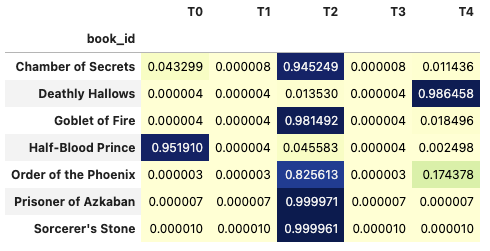

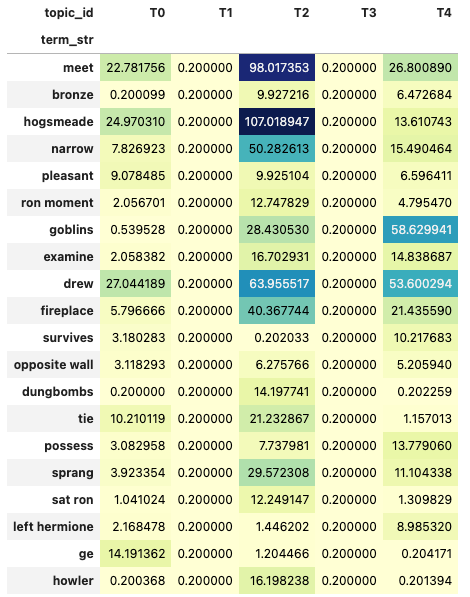

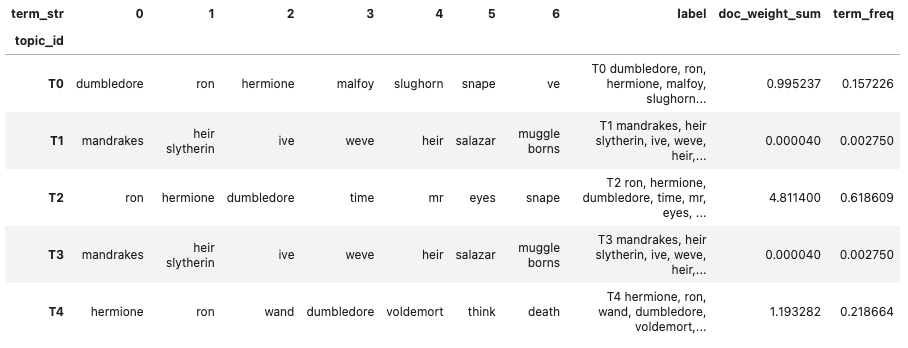

The next analysis of the novels included creating word embeddings for the (roughly) top 1,000 words returned as being the ‘most important’ during the principal component analysis step. To create word embeddings, the word2vec package was used with a window size of 5, a vector size of 246, a minimum count of 50, and 4 workers. From here, TSNE analysis was performed with a perplexity set to 40, 2 components, an initialized state “pca,” and 2,500 iterations. X and Y coordinates were then created for each of the words in a COORDS dataframe, and this was joined with the VOCAB dataframe in order to get some more statistics for each of the terms. Finally, the terms were all plotted on the same graph, colored by the maximum part of speech, and displayed below.

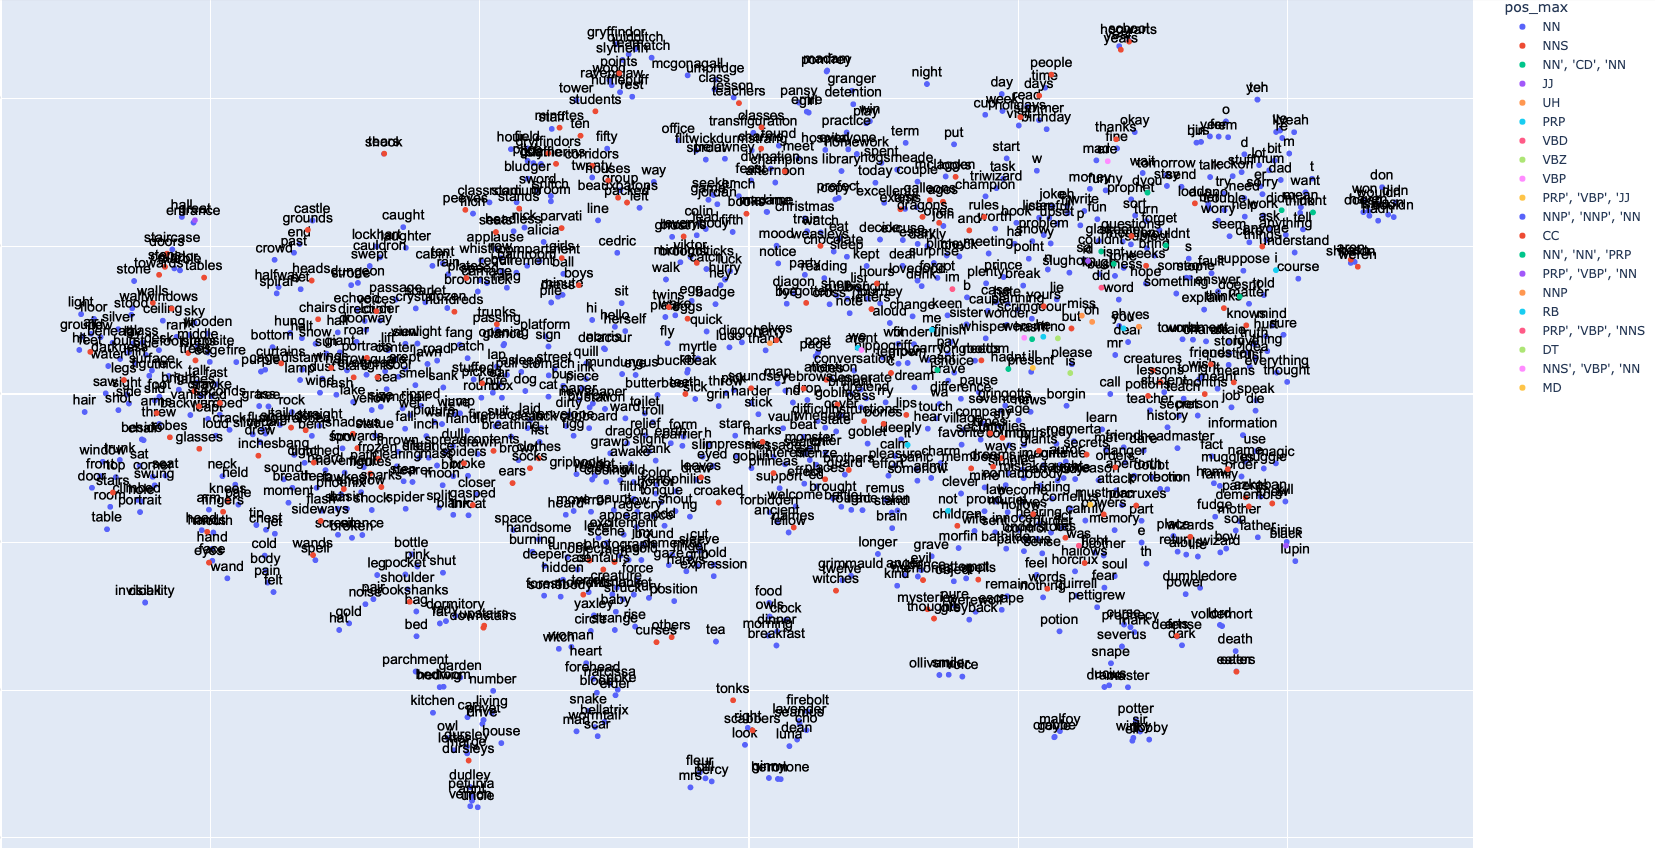

The final step in the general analysis of the seven novels was understanding the emotions and sentiments throughout them. For this, the NRC emotion lexicon values were taken from the document "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt" provided through this course. The emotions and sentiment valued were mapped onto the terms from the CORPUS dataframe, and following this they were aggregated across the novels by chapter and entire book. The first plot below displays the sentiment, as well as trust, fear, and joy emotions from the first chapter of the first novel to the final chapter in the last novel. Next, the SentimentIntensityAnalyzer was used from the vader.sentiment library in order to plot sentiment intensity across the entire series. The second figure below displays how the positive and negative sentiments changed throughout the novels by using a window of 30 sentences.

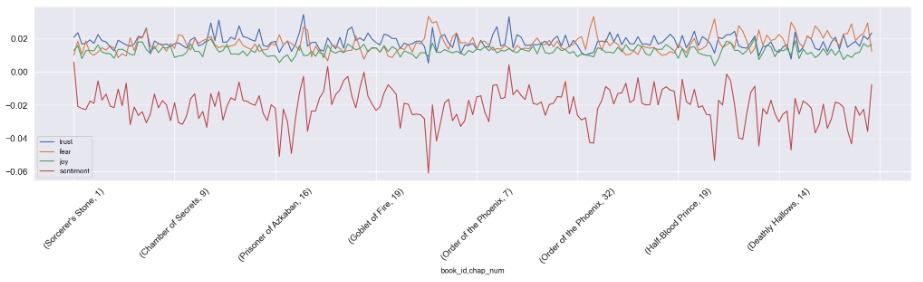

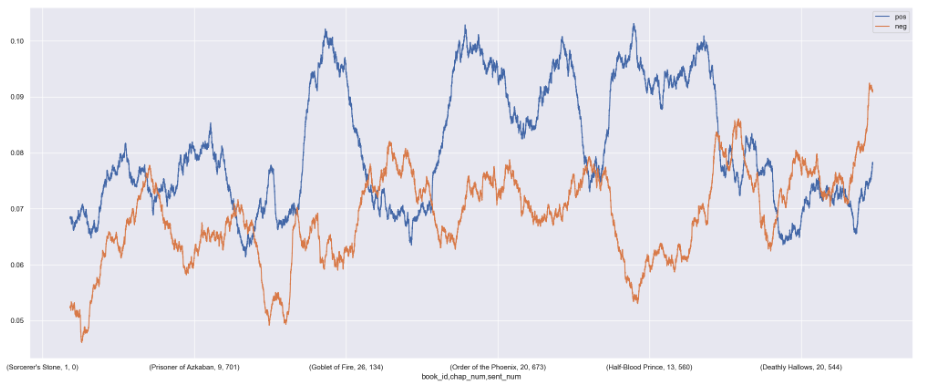

# Interpretation

Overall, the analysis methods used were able to help me have a better look into the relationships between the seven novels in the Harry Potter series. The dendrograms created to show comparisons between were very helpful, and some of them even displayed the exact relationships that I was expecting. The dendrogram using the Jaccard and Jennsen Shannon measures grouped the final two books separately, which makes sense as I believed these two to be very similar in terms of how dark they were. The Euclidean measure even grouped the third, sixth, and seventh books together, which is even more in line with the predictions I made. I also found it interesting how the fourth novel, across each of the dendrograms, did not seem too similar to any of the other novels - I believe that this might have to do with the stark changes of sentiment within the novel, as some very good and very bad things occurred throughout.

The “heat maps” produced using principal component analysis did not do much to help answer my questions, but when paired with the positive and negative words extracted from each component there were some interesting finds. When matching each of the principal components (which seemed to have very little overlap) to these words, it is very obvious that it thought of each of the books and their respective characters very differently. Topic modeling yielded similar results, with the topics themselves not being all that helpful. However, when the topics are looked at while also looking at the top words for each, some simple connections between the topics and novels they represent strongly can be gleaned. The word embeddings also did not help much to answer my questions, but I really enjoyed exploring the visual plotting the words against each other on the x and y axes. I spent a good amount of time playing around with this visualization and was able to find some pretty interesting clusters of words within it. Again, they did not relate strongly to the main question I asked, but they helped give me a much better understanding of how this text analysis made use of the vocabulary corpus. 

The visualization that I found most useful for understanding my question about change in sentiment throughout the series was (probably unsurprisingly) from the sentiment and emotion analysis conducted towards the end. More specifically, the final visualization in this document helps to show both negative and positive sentiments as they progress throughout the series. While the graphic does not show the sentiments in an exact book-by-book manner, there are several noticeable patterns. To begin, the sixth and seventh books have very high values for the negative sentiment intensities. It is also pretty easy, when looking at the figure from left to right, to pick out several major occasions where positive and negative intensities deviated greatly. Among these are the ends of books 2, 3, 4, 5, 6, and 7 (the moving window did not benefit the analysis for book number 1). The sharp drops in positive sentiment intensity also pretty closely correlate with the ends of books 4, 5, and 6, and the entirety of book 7 is not very positive.

Through my analyses, I also encountered several issues that I would like to address in the future. The main issue I found came from inconsistent vocabularies across books. During topic modeling and principal component analysis, I found that entire topics would be created and strongly centered on a subset of words that was far more prevalent in some books than others. This is to be expected, but it makes direct comparisons between the novels in this way difficult. For example, two characters may seem to have similar sentiments and roles to a reader, but if they are in different books the top words for each extracted topic may not represent them being similar. However, in the end I believe that this gave me a great deal of insight into the structure of each of the books, but more importantly how they compare to each other.